In [1]:
from matplotlib import pyplot as plt

import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
from sklearn.metrics import mean_squared_error as mse; rmse = lambda *x: mse(*x)**0.5

from custome import DataFrameHandler, CrossValSampler, get_Xy, BLinearRegression

In [2]:
# Global const.
TRAIN_TO_ALL_DATA_RATION = 8 / 10
DROP_COLUMNS = ['sex', 'smoker', 'region']
CHECK_COLUMNS = ['female', 'male', 'southwest', 'southeast', 'northwest', 'northeast']
STATISTICS_COUNT_COLUMNS = [
    'age', 'bmi', 'children', 'charges', 'female', 'male', 'northeast', 'northwest', 'southeast', 'southwest'
]

In [3]:
data_handler = DataFrameHandler()

# Load all data and shuffle it.
df = pd.read_csv('insurance.csv')
df = df.sample(df.shape[0], random_state=7).reset_index(drop=True)

train_len = round(df.shape[0] * TRAIN_TO_ALL_DATA_RATION)

# Devide all data to train/test parts.
train_df = df.iloc[:train_len]
test_df = df.iloc[train_len:]

# Prepare data.
train_df = data_handler.prepare_dataset(train_df, DROP_COLUMNS, CHECK_COLUMNS)
train_statistics = data_handler.count_statistics(train_df, STATISTICS_COUNT_COLUMNS)
train_df = data_handler.normalize_dataset(train_df, train_statistics)

test_df = data_handler.prepare_dataset(test_df, DROP_COLUMNS, CHECK_COLUMNS)
test_df = data_handler.normalize_dataset(test_df, train_statistics)

In [4]:
X, y = get_Xy(train_df, target_name="charges")

In [6]:
train_val_sampler = CrossValSampler(X, y, val_size=300)

train, val = train_val_sampler()
X_train, y_train = train
X_val, y_val = val

model = BLinearRegression(chains=2)
model.fit(X_train, y_train)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, w]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 220 seconds.


In [7]:
az.summary(model.trace, round_to=2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/david-tyuman/py_env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],0.01,0.03,-0.05,0.08,0.00,0.00,3904.05,2871.94,1.0
w[1],0.22,0.03,0.16,0.29,0.00,0.00,4227.27,2776.25,1.0
w[2],0.18,0.04,0.11,0.25,0.00,0.00,3657.45,3011.52,1.0
w[3],0.05,0.03,-0.01,0.11,0.00,0.00,3047.49,2669.17,1.0
w[4],-0.21,6.98,-12.81,13.19,0.16,0.11,1910.96,2157.44,1.0
w[5],-0.16,6.98,-13.88,12.10,0.16,0.11,1911.29,2133.23,1.0
w[6],0.14,4.92,-9.30,9.32,0.15,0.10,1157.18,1613.75,1.0
w[7],0.10,4.91,-9.33,9.27,0.14,0.10,1157.19,1594.09,1.0
w[8],0.14,5.12,-9.35,10.05,0.15,0.11,1159.05,1580.60,1.0
w[9],0.08,5.02,-9.20,9.82,0.15,0.10,1157.71,1594.13,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/david-tyuman/py_env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


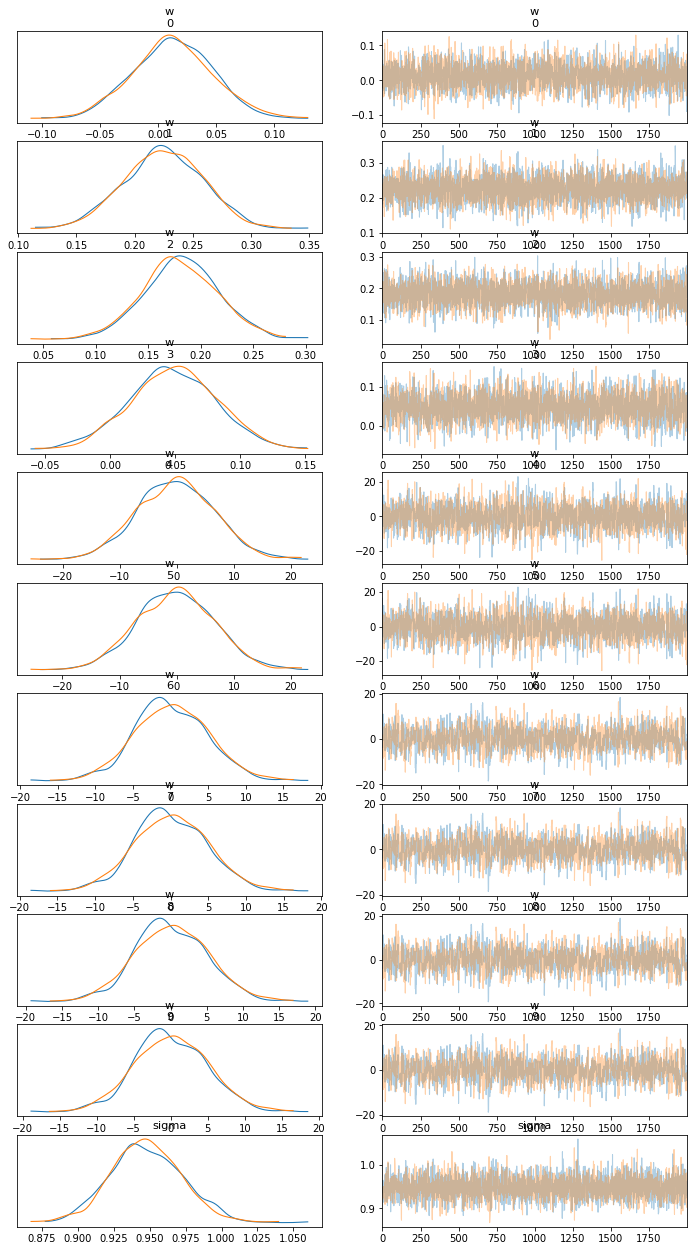

In [8]:
az.plot_trace(model.trace, compact=False);

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/david-tyuman/py_env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


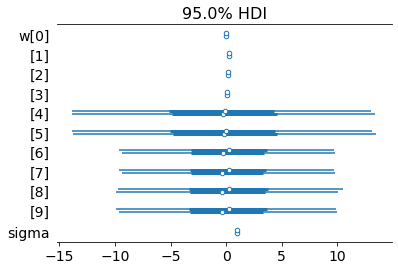

In [9]:
az.plot_forest(model.trace, hdi_prob=0.95, figsize=(6, 4));

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/david-tyuman/py_env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


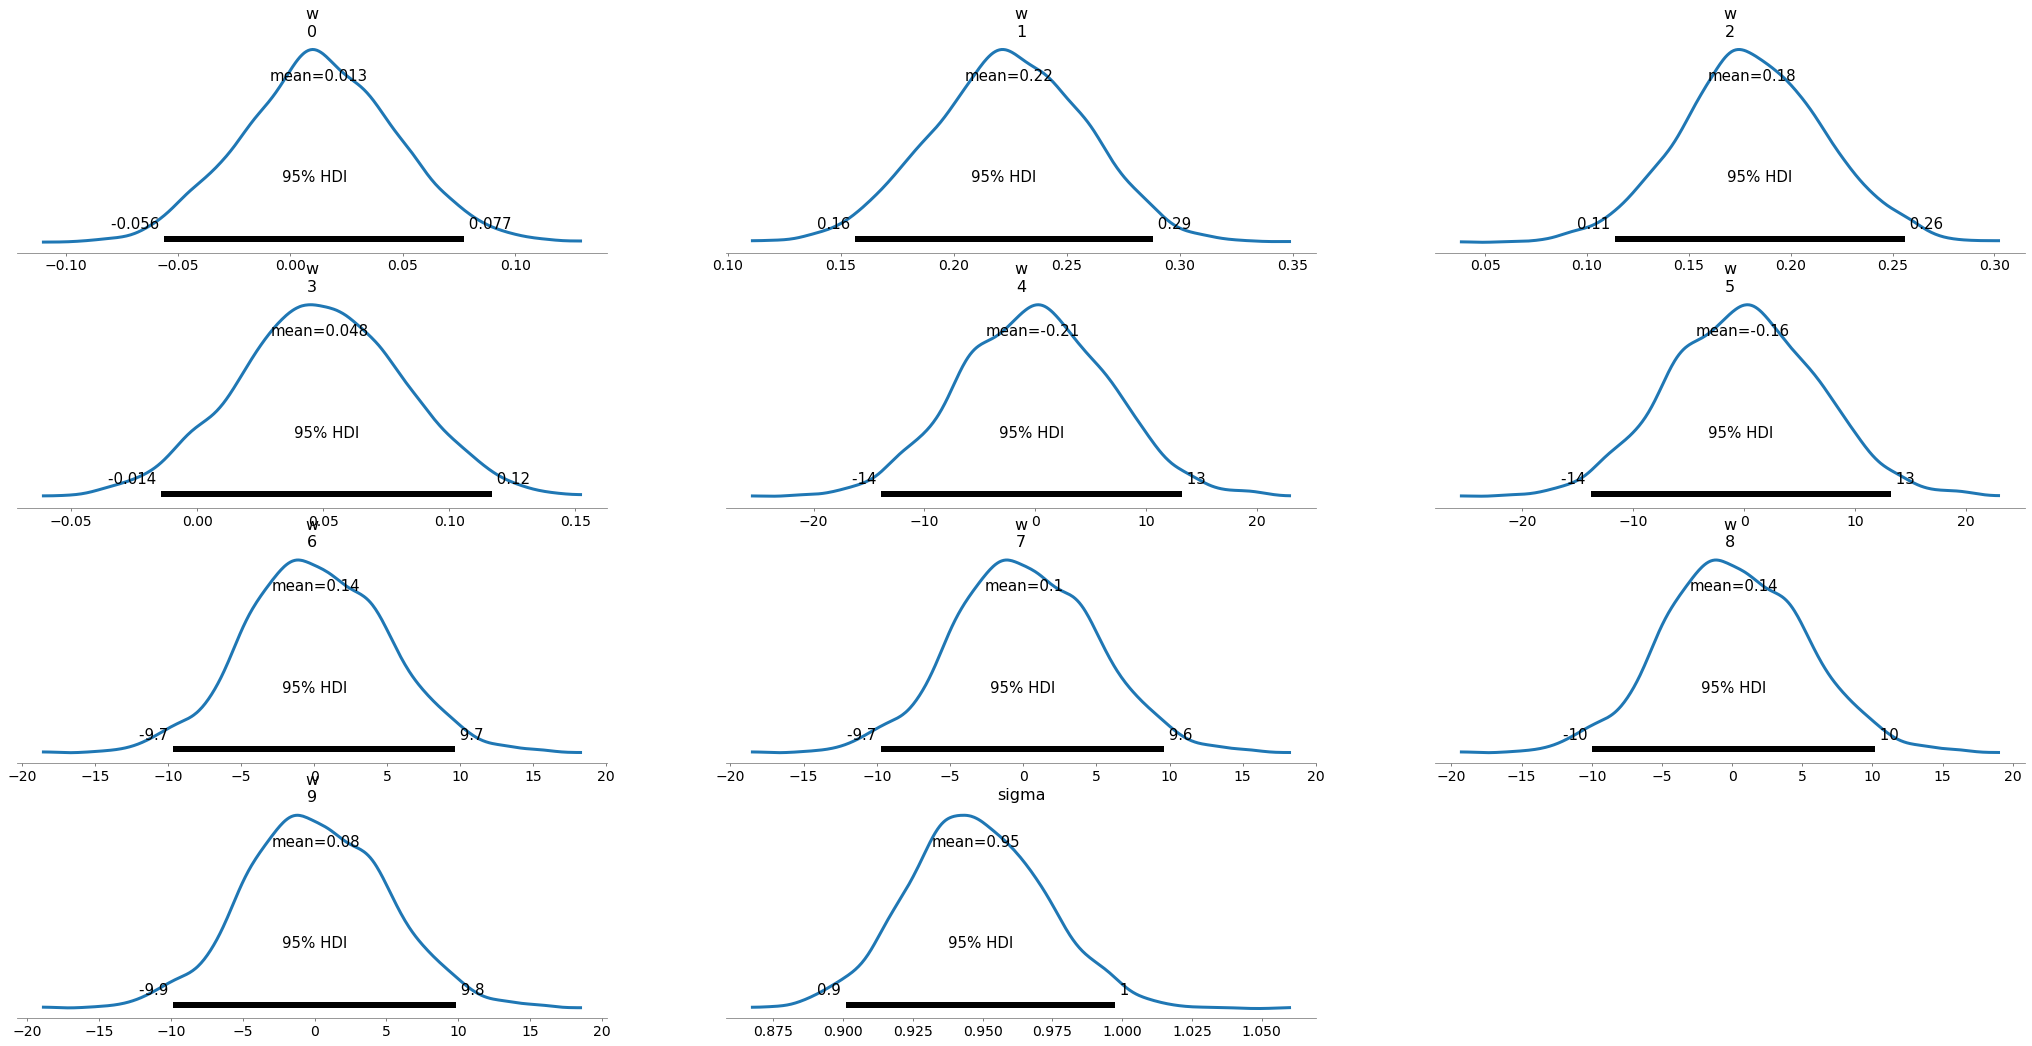

In [10]:
az.plot_posterior(model.trace, hdi_prob=0.95, figsize=(36, 18), lw=3);

In [11]:
# So, it is observed that the model has completely converged!

In [12]:
# Let's look in model some deeper.

In [13]:
train_val_sampler = CrossValSampler(X, y, val_size=300)

train, val = train_val_sampler()
X_train, y_train = train
X_val, y_val = val

model = BLinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_conf_pred = model.predict_confidence(X_val)
rmse(y_val, y_pred)

/Users/david-tyuman/py_env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, w]


Sampling 1 chain for 1_000 tune and 2_000 draw iterations (1_000 + 2_000 draws total) took 215 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


0.933912209780728

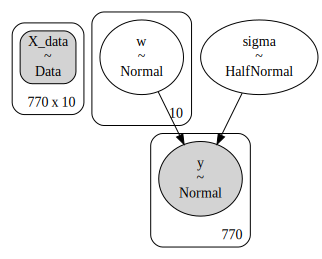

In [14]:
# Model architecture.
pm.model_to_graphviz(model._pm_model)

In [21]:
th_median = 0.0965

print(len(np.where(y_conf_pred < th_median)[0]) / len(y_conf_pred))  # Shoud be ~0.5~

0.5


RMSE: 0.8994


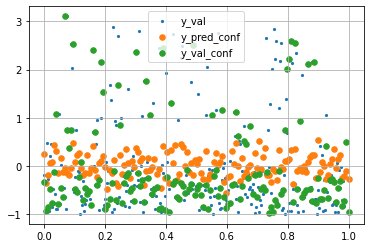

In [22]:
# Confident prediciton.

indexes = np.where(y_conf_pred < th_median)[0]  # 50% left.

plt.scatter(np.linspace(0, 1, len(y_val)), y_val, 4.5, label='y_val')
plt.scatter(np.linspace(0, 1, len(y_val[indexes])), y_pred[indexes], 30.5, label='y_pred_conf')
plt.scatter(np.linspace(0, 1, len(y_val[indexes])), y_val[indexes], 30.5, label='y_val_conf')
plt.legend()
plt.grid();

print('RMSE: %.4f' % rmse(y_val[indexes], y_pred[indexes]))

RMSE: 0.9672


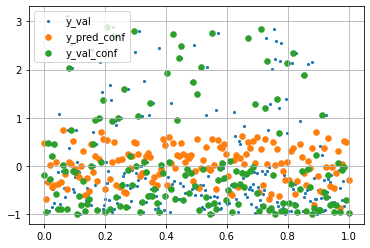

In [23]:
# UnConfident prediciton.

indexes = np.where(y_conf_pred > th_median)[0]  # 50% right.

plt.scatter(np.linspace(0, 1, len(y_val)), y_val, 4.5, label='y_val')
plt.scatter(np.linspace(0, 1, len(y_val[indexes])), y_pred[indexes], 30.5, label='y_pred_conf')
plt.scatter(np.linspace(0, 1, len(y_val[indexes])), y_val[indexes], 30.5, label='y_val_conf')
plt.legend()
plt.grid();

print('RMSE: %.4f' % rmse(y_val[indexes], y_pred[indexes]))

In [24]:
# So, we see, that on unconfident samples score worse.

In [25]:
# Let's try to investigate the differences in the distributions of features stratified by the reliability of the model.

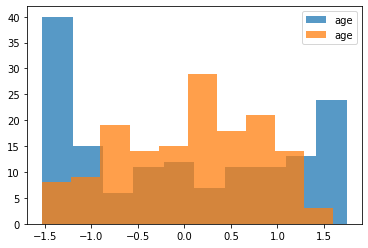

In [26]:
indexes = np.where(y_conf_pred > th_median)[0]

train_df.iloc[np.where(y_conf_pred > th_median)[0]].age.hist(bins=10, alpha=0.75, legend='50% most confident')
train_df.iloc[np.where(y_conf_pred < th_median)[0]].age.hist(bins=10, alpha=0.75, legend='50% most confident')

plt.legend()
plt.grid();

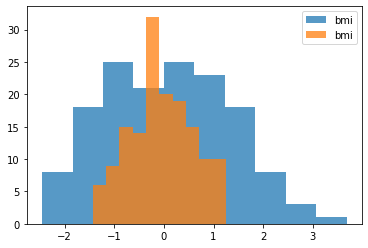

In [27]:
indexes = np.where(y_conf_pred > th_median)[0]

train_df.iloc[np.where(y_conf_pred > th_median)[0]].bmi.hist(bins=10, alpha=0.75, legend='50% most confident')
train_df.iloc[np.where(y_conf_pred < th_median)[0]].bmi.hist(bins=10, alpha=0.75, legend='50% most confident')

plt.legend()
plt.grid();